## Machine Learning HW5 Simulation Part 

## (Principal Component Analysis (PCA) and Linear Discriminant Analysis (LDA))

## Amirmahdi Ansaripour (810198358)

In this part, two famous methods for dimension reduction, named PCA and LDA, are explained. 


1. $\textbf{PCA: }$ This method is an unsupervised way (does not pay attention to samples' labels) and tries to maximize the variance of data when they are mapped to the latent space. The optimization problem is:

$$\vec{u}^\ast = \underset{\vec{u}}{\operatorname{argmax}} \space (\text{var}(\vec{x}^T.\vec{u})) =  \underset{\vec{u}}{\operatorname{argmax}} \space (\vec{u}^T S \, \vec{u} ) \;\;\;\; ( \text{subject to} \; ||\vec{u}||_2^2 = 1 )$$

Where $S$ is the covariance matrix.

Because of the condition and making the problem differentiable, we should use the Lagrangian function. The output will be: 
$$\vec{u}^\ast = \underset{\vec{u}}{\operatorname{argmax}} \space (\lambda) \;\;\;\; ( \text{subject to} \; \lambda \ge 0 )$$

Where $\lambda$ is the eigen value for the covariance matrix: $S\vec{u} = \lambda \vec{u}$.

Pay attention that the above eigen value eigen vector problem has $d$ answers, but the optimized $\vec{u}$ is the one whose corresponding eigen value ($\lambda$) is the greatest. 

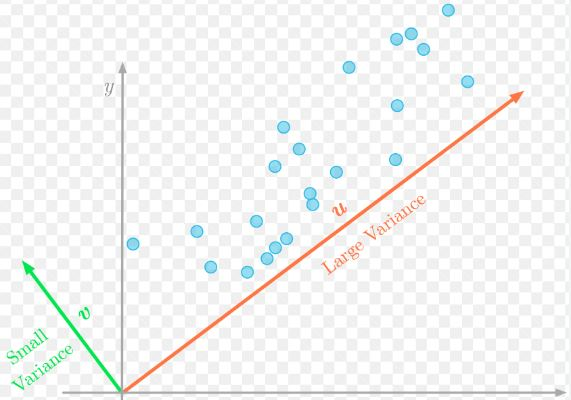

In [1]:
from PIL import Image
import glob
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
import pandas as pds
from sklearn.preprocessing import StandardScaler

In [2]:
def load_images(add):
    x_train = []
    Images = []
#     i = 0
    for filename in glob.glob(add):
        image = Image.open(filename)
        Images.append(image)
#         plt.figure(i)
#         plt.imshow(image)
#         i += 1
        x_train.append(np.asarray(image).reshape(image.size[0] * image.size[1], ))
    return np.asarray(x_train), Images

In [3]:
def get_cumulative_variance(variances):
    cum_variance = 0
    res_index = 0
    done = False
    var_list = []
    for i in range(len(variances)):
        cum_variance += variances[i]
        if cum_variance > 0.8 and done == False:
            res_index = i
            done = True
        var_list.append(cum_variance)
    print('Efficient number of components to avoid overfitting')
    print(res_index)
    
    plt.plot(np.arange(0, len(variances)), var_list)
    plt.xlabel('Number of components')
    plt.ylabel('Cumulative variance')
    plt.title('Efficient number of components to avoid overfitting')
    plt.show()

In [4]:
x_train, train_images = load_images('./Q5_Datasets/part1/emotion_detection_dateset/train/*.*')
x_test, test_images = load_images('./Q5_Datasets/part1/emotion_detection_dateset/test/*.*')

In [5]:
data = np.concatenate([x_train, x_test])
data = StandardScaler().fit_transform(data)

In [6]:
model = PCA()
model.fit_transform(data)
eigen_values = model.singular_values_

In [8]:
# print(len(eigen_values))

## Part A: plotting eigen values and detecting the efficient number of components

As it can be seen in the next two parts, many eigen values have been obtained. Each of these eigen values corresponds to the variance of samples after being mapped on respective components. 

Moreover, first eigen values have greater magnitudes, meaning that when mapped on relative components, samples will have greater variance. As a result, those components are more desirable.

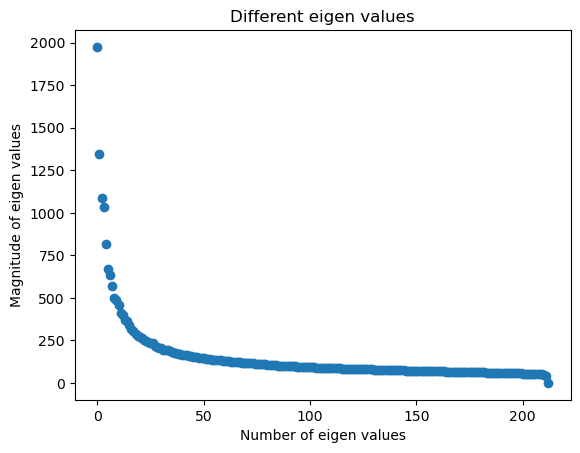

In [7]:
axis = [i for i in range(len(eigen_values))]
plt.scatter(axis, eigen_values)
plt.xlabel('Number of eigen values')
plt.ylabel('Magnitude of eigen values')
plt.title('Different eigen values')
plt.show()

In order to find the efficient number of components, we should use the $\textbf{explained variance ratio}$. This method gives us the list of proportional variances of PCA output components. 


Total variance is equal to the summation of variances of components which we have chosen. Obviously, we start from the greatest variance belonging to the first eigen value, and add consecutive variances up until we reach an acceptable percentage, like (80%).


It is also worthwhile to mention that the model overfits if we try to reach full variance. So there is a trade-off between choosing many eigen vectors and the complexity of latent space whose features are reduced.


Efficient number of components to avoid overfitting
15


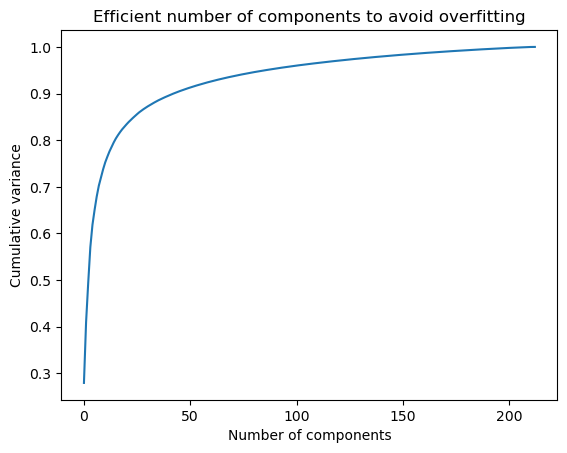

In [8]:
get_cumulative_variance(model.explained_variance_ratio_)

## Part B: Plotting some eigen values

In the following parts, some eigen vectors are shown. As previously discussed, first components are more suitable and have greater varaince, thus making the separation of data better. 

On the other hand, the last four components have the least variance; therefore, samples mapped on them are too vague.


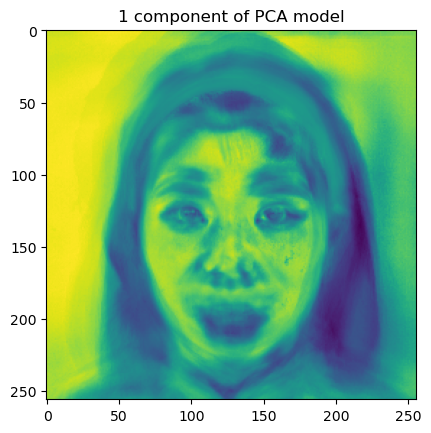

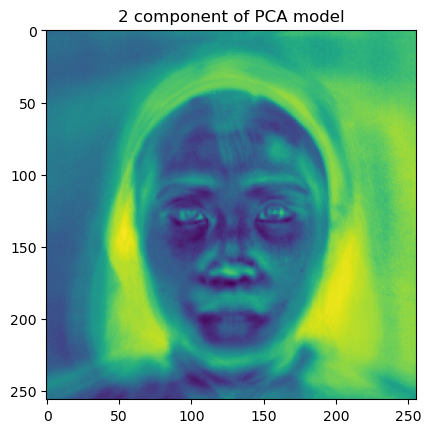

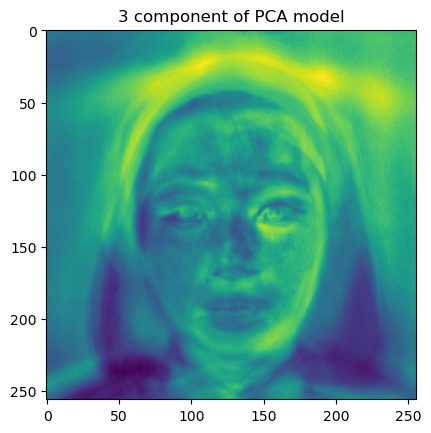

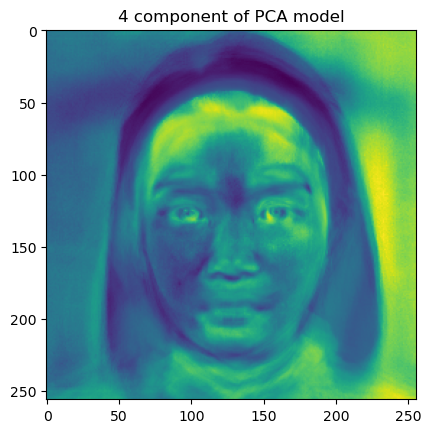

In [9]:
components = model.components_
for i in range(4):
    plt.figure(i)
    plt.imshow(components[i].reshape(256, 256))
    plt.title(str(i + 1) + ' component of PCA model')
    plt.show()

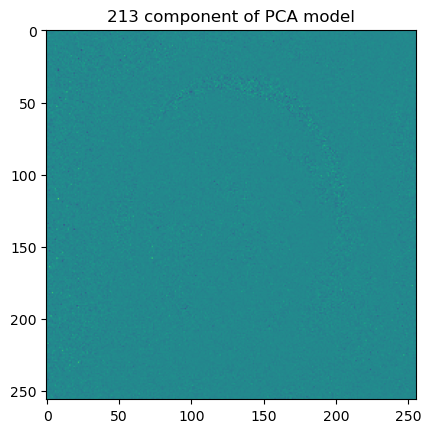

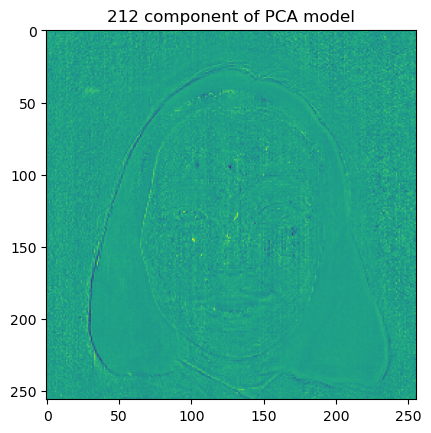

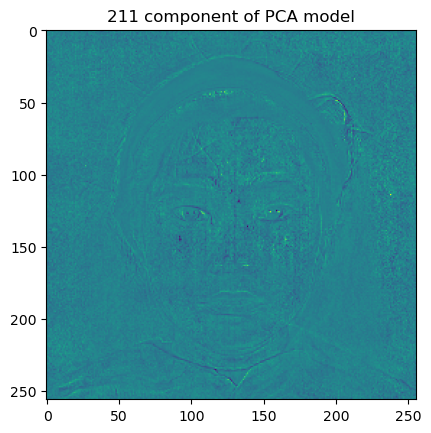

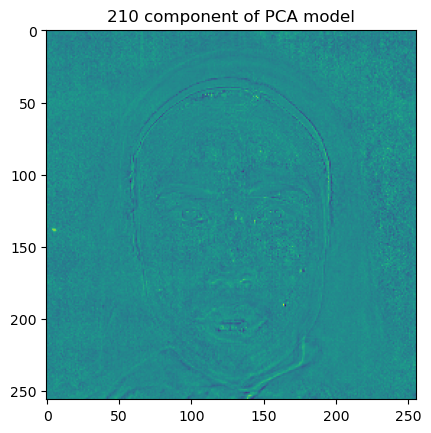

In [10]:
n = len(components) - 1
for i in range(4):
    plt.figure(i)
    plt.imshow(components[n - i].reshape(256, 256))
    plt.title(str(n - i + 1) + ' component of PCA model')
    plt.show()

In [11]:
def scatter_matrix(x, y):
    labels = np.unique(y)
    mean_all_classes = np.mean(x, axis = 0)
#     print("Mean of all classes:  ", type(mean_all_classes))
    SW = np.zeros((x.shape[1], x.shape[1]))
#     print("Shape:  " , SW.shape)
    SB = np.zeros((x.shape[1], x.shape[1]))
#     print("Labels: ", labels.shape)
    for label in labels:
        x_specific_class = x[y==label]
        mean_specific_class = np.mean(x_specific_class, axis = 0)
        SW_for_specific_class = (x_specific_class - mean_specific_class).T.dot(x_specific_class - mean_specific_class)
        SW += SW_for_specific_class
        number_of_samples_in_class = x_specific_class.shape[0]
        SB_for_specific_class = number_of_samples_in_class * (mean_specific_class - mean_all_classes).dot((mean_specific_class - mean_all_classes).T)
        SB += SB_for_specific_class
    return np.linalg.inv(SW).dot(SB)

In [12]:
def plot_eigen_values(matrix):
    eigen_values, eigen_vectors = np.linalg.eig(matrix)
#       print(len(eigen_values))
#     print(len(eigen_vectors))
    plt.plot(np.arange(0,len(eigen_values)), abs(eigen_values))
    plt.xlabel('ith eigen value')
    plt.ylabel('Magnitude of eigen values')
    plt.title('Different eigen-values (components)')
    plt.show()

In [13]:
def reshape_images(raw):
    resized_images_train = []
    x_train = []
    for i in range(len(raw)):
        resized = (raw[i]).resize((50, 50))
        resized_images_train.append(resized)
        x_train.append(np.asarray(resized).reshape(resized.size[0]*resized.size[1], ))
    return x_train

In [14]:
def calc_trace(matrix):
#     print(matrix.shape)
#     print(matrix[0:9,0:9])
    main_diagonal = np.array([matrix[i][i] for i in range(len(matrix))])
    trace = []
    features_num = []
    for i in range(len(main_diagonal)):
        trace.append(np.sum(main_diagonal[i:]))
        features_num.append(len(main_diagonal) - i)
    plt.plot(features_num, trace)
    plt.xlabel("Number of features")
    plt.ylabel('Trace value')

## Part C) Plotting eigen values of separability matrix

In this section, the second method of dimension reduction is discussed, which is called $\textbf{LDA}$. LDA is a supervised method in which labels are important. First, two symmetric matrixes indicating $\textbf{between class}$ and $\textbf{within class}$ distance should be calculated (The formulas are written for binary classification but they can be generalized to more classes): 

$$S_{Between} = (m_1 - m_2)(m_1 - m_2)^T \;\;\;\;\; S_{Within} = s_1^2 + s_2^2$$

Where $m_1 = \sum_{x_i \in class_1} \frac{x_i}{n_1}, m_2 = \sum_{x_i \in class_2} \frac{x_i}{n_2}, s_1^2 = \sum_{x_i \in class_1} \frac{(x_i)^2}{n_1} , s_2^2 = \sum_{x_i \in class_2} \frac{(x_i)^2}{n_2}$

The optimization problem is :

$\vec{w}^\ast =  \underset{\vec{w}}{\operatorname{argmax}} \space \frac{w^T S_B w}{w^T S_W w} \equiv \underset{\vec{w}}{\operatorname{argmax}} \space w^T S_B w \;\;\; ( \text{subject to: } w^T S_w w = constant )$

Again because of the condition we should use the Lagrangian method:

$$\vec{w}^\ast = \underset{\vec{w}}{\operatorname{argmax}} \space (\lambda) \;\;\;\; ( \text{subject to} \; \lambda \ge 0 )$$

Where $\lambda$ belongs to an eigen value eigen vector problem: $\space \space S_W^{-1} S_B w = \lambda w$ 

In [16]:
x_train = pds.read_csv('./Q5_Datasets/part2/Fashion-MNIST/trainData.csv', header=None)
y_train = pds.read_csv('./Q5_Datasets/part2/Fashion-MNIST/trainLabels.csv', header=None)
x_test = pds.read_csv('./Q5_Datasets/part2/Fashion-MNIST/testData.csv', header=None)
y_test = pds.read_csv('./Q5_Datasets/part2/Fashion-MNIST/testLabels.csv', header=None)

In [17]:
y_train = np.array(y_train).ravel()
y_test = np.array(y_test).ravel()
x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)

In [20]:
data = np.concatenate([x_train, x_test])
data = StandardScaler().fit_transform(data)
labels = np.concatenate([y_train, y_test])
separabilityMatrix = scatter_matrix(data, labels)

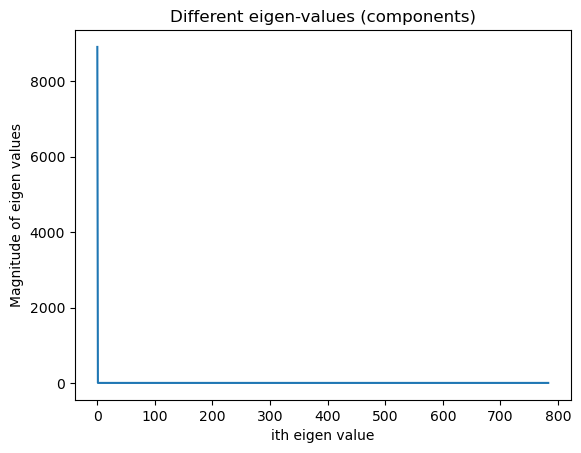

In [21]:
plot_eigen_values(separabilityMatrix)

## Plotting trace values of separability matrix

It can be mathematically proven that: 
$$ trace(A) = {\sum_{i = 1}^{n}\lambda_{i}} $$

Based on the equation, we can conclude that by choosing more features, which are equal to more eigen-values, the trace of separability matrix will remain fixed ($\lambda_{i} = 0$) or increase ($\lambda_{i} > 0$). Pay attention that based on the graph drawn in the previous section, eigen-values are all non-negative.

As a result, the trace value of the separability matrix will increase as the number of components increases.

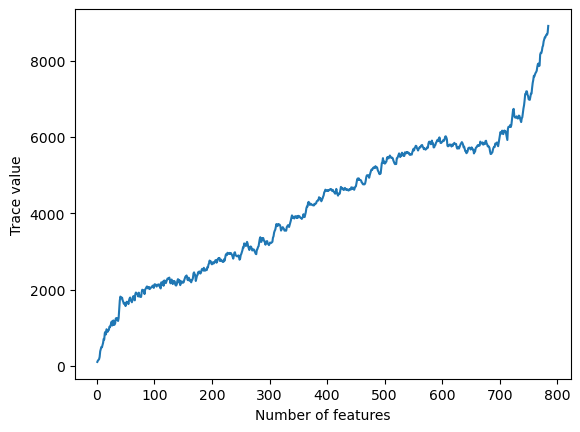

In [22]:
calc_trace(separabilityMatrix)